In [1]:
import sys, os
import numpy as np
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

local_path = '/Users/halvardbariller/Desktop/M2_MVA/_SEMESTER_1/PGM/Project/Score-matching-project-'
sys.path.append(local_path)

%load_ext autoreload
%autoreload 2

import dataset
from dataset import sampling, densities, scores, visualisation
import score_matching
from score_matching import toy_models, learning_objectives, score_visualisation
import mcmc_sampling
from mcmc_sampling import langevin, dynamics_plot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data creation

### GMM

In [2]:
# Parameters
N = 10000
mus = [np.array([0, 0]), np.array([10,10])]
sigmas = [np.eye(2), np.eye(2)]
alphas = [0.2, 0.8]

# Dataset
gmm_data, clusters = sampling.gaussian_mixture_sampling(mus, sigmas, alphas, N)

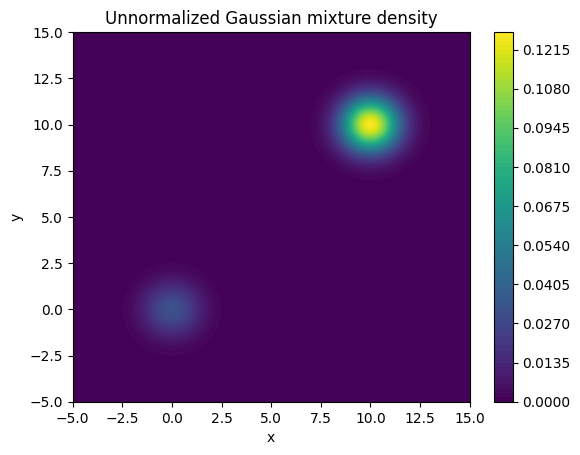

In [3]:
visualisation.gmm_density_heatmap(densities.gmm_density, mus, sigmas, alphas)

### Banana shaped

In [6]:
# Parameters
N = 10000
mu_banana = np.array([0, 0])
sigma_banana = np.eye(2)
b = 0.5

# Dataset
banana_data = sampling.banana_shaped_sampling(N, mu_banana, sigma_banana, b)

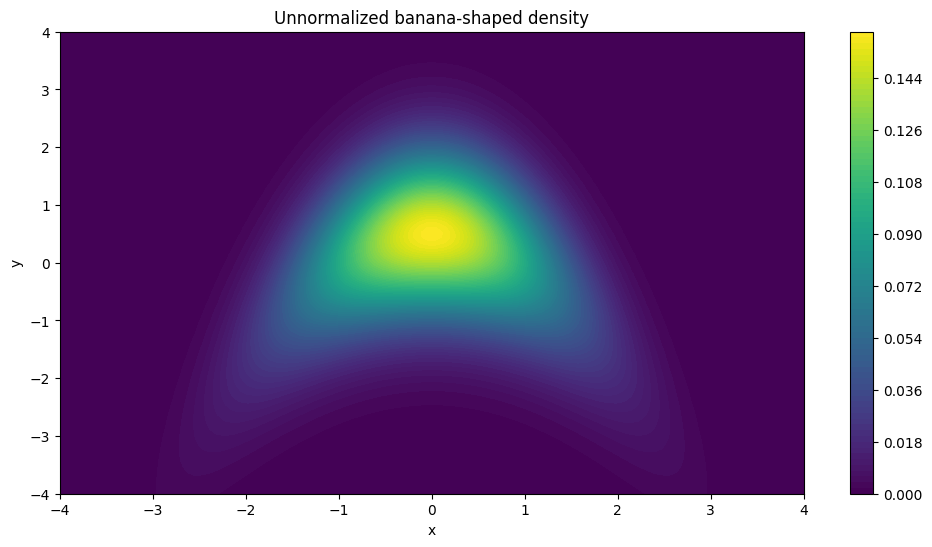

In [7]:
visualisation.banana_density_heatmap(densities.banana_density, mu_banana, sigma_banana, 0.5)

# Exact Scores

In [8]:
step = 1e-2
iterations = 300
n_samples = 10000

### GMM

#### Distribution reconstruction with unnadjusted Langevin

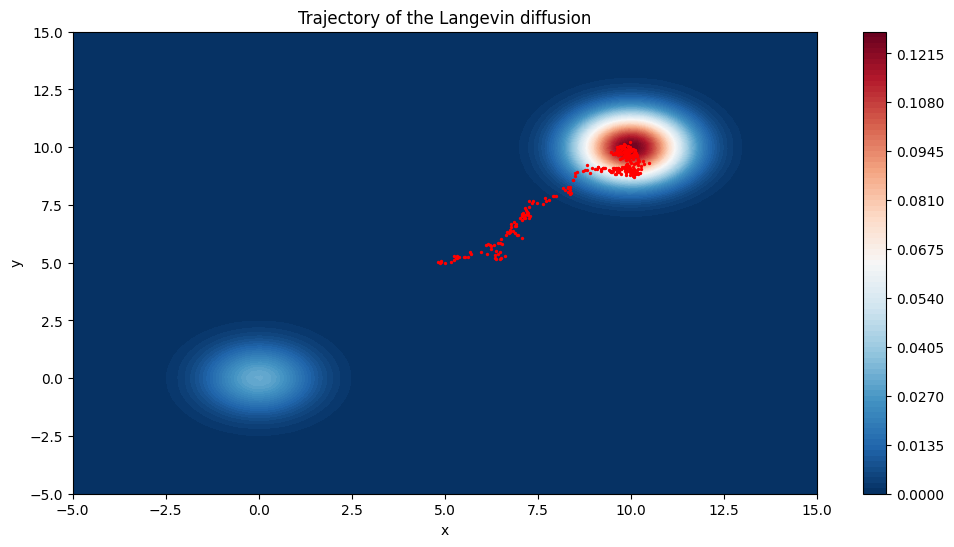

In [9]:
_, x_trajectory_gmm = langevin.euler_maruyama_exact_scores(np.array([5,5]), scores.gaussian_mixture_score, 
                                                                     step, iterations, mus, sigmas, alphas)

dynamics_plot.langevin_trajectory_gmm(x_trajectory_gmm, mus, sigmas, alphas)

100%|██████████| 10000/10000 [01:59<00:00, 83.47it/s]


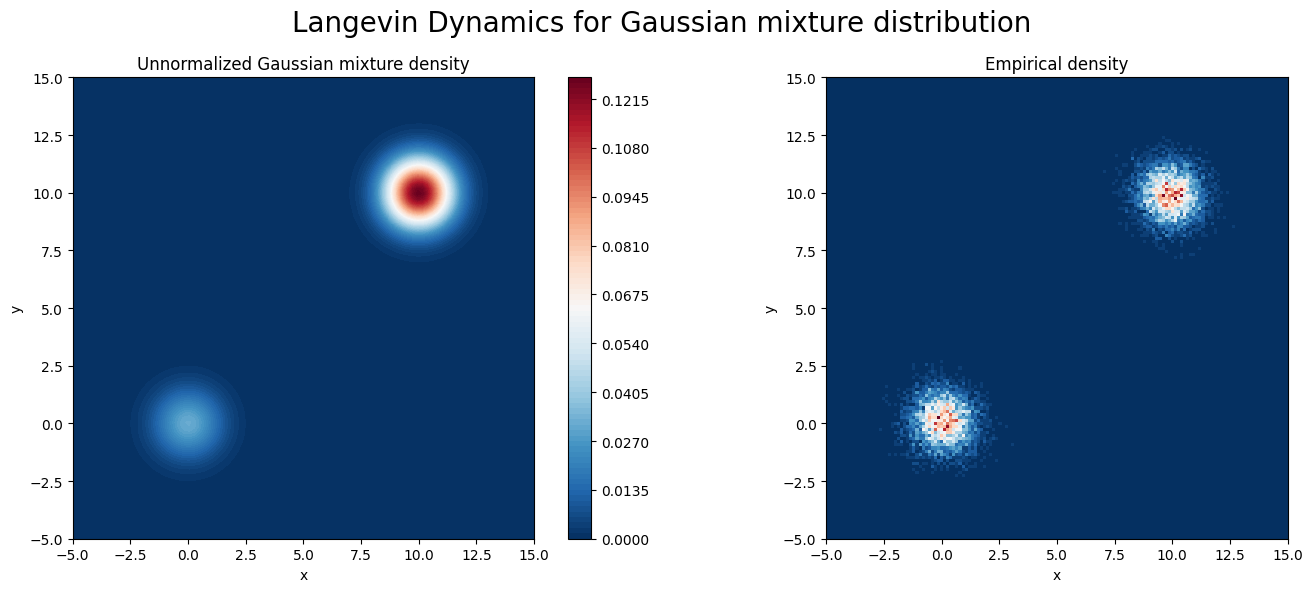

In [10]:
gmm_samples = langevin.unnadjusted_langevin_sampling(scores.gaussian_mixture_score, step, 
                                                     iterations, n_samples, mus, sigmas, alphas)

dynamics_plot.langevin_sampling_gmm(gmm_samples, mus, sigmas, alphas)

#### Distribution reconstruction with Metropolis-Hastings Adjusted Langevin

Acceptance rate:  1.0


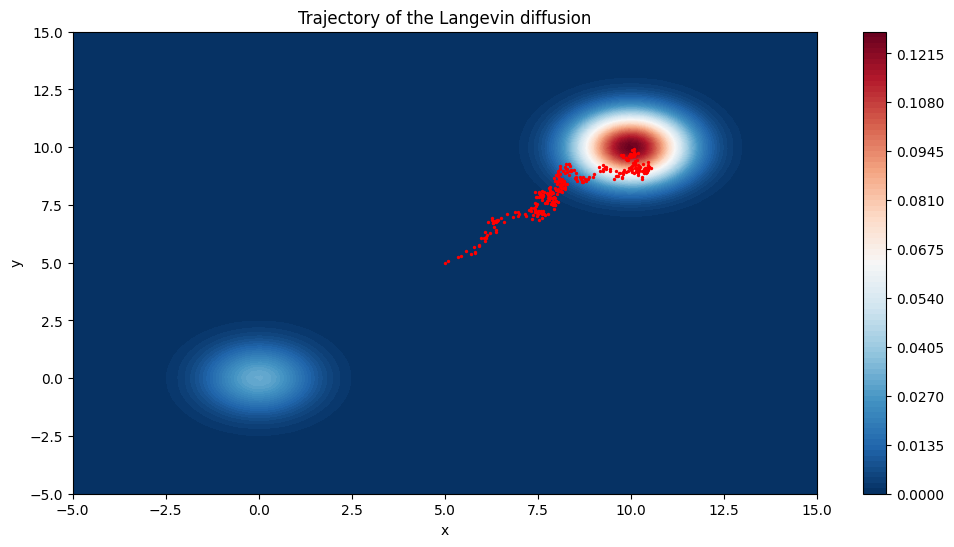

In [11]:
_, x_trajectory_mh_gmm = langevin.mh_langevin_exact_scores(np.array([5,5]), scores.gaussian_mixture_score,
                                                                step, iterations, mus, sigmas, alphas)

dynamics_plot.langevin_trajectory_gmm(x_trajectory_mh_gmm, mus, sigmas, alphas)

100%|██████████| 10000/10000 [11:40<00:00, 14.27it/s]


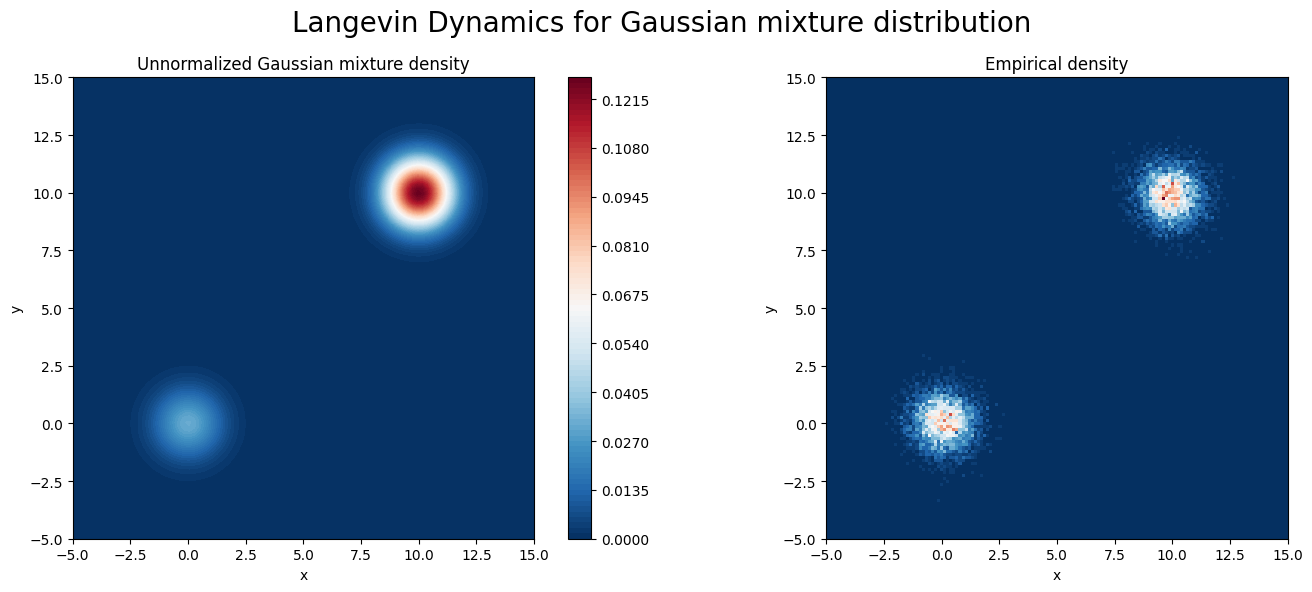

In [12]:
gmm_samples_mh = langevin.mh_langevin_sampling(scores.gaussian_mixture_score, step,
                                                iterations, n_samples, mus, sigmas, alphas)

dynamics_plot.langevin_sampling_gmm(gmm_samples_mh, mus, sigmas, alphas)

### Banana

#### Distribution reconstruction with unnadjusted Langevin

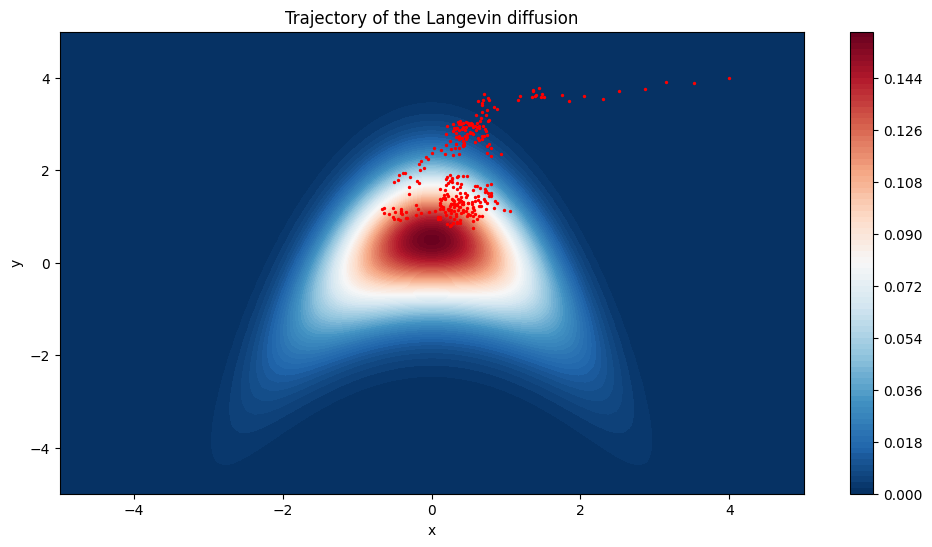

In [13]:
_, x_trajectory_banana = langevin.euler_maruyama_exact_scores(np.array([4,4]), scores.score_banana, 
                                                                       step, iterations, mu_banana, sigma_banana)

dynamics_plot.langevin_trajectory_banana(x_trajectory_banana, mu_banana, sigma_banana, b)

100%|██████████| 10000/10000 [00:12<00:00, 799.74it/s]


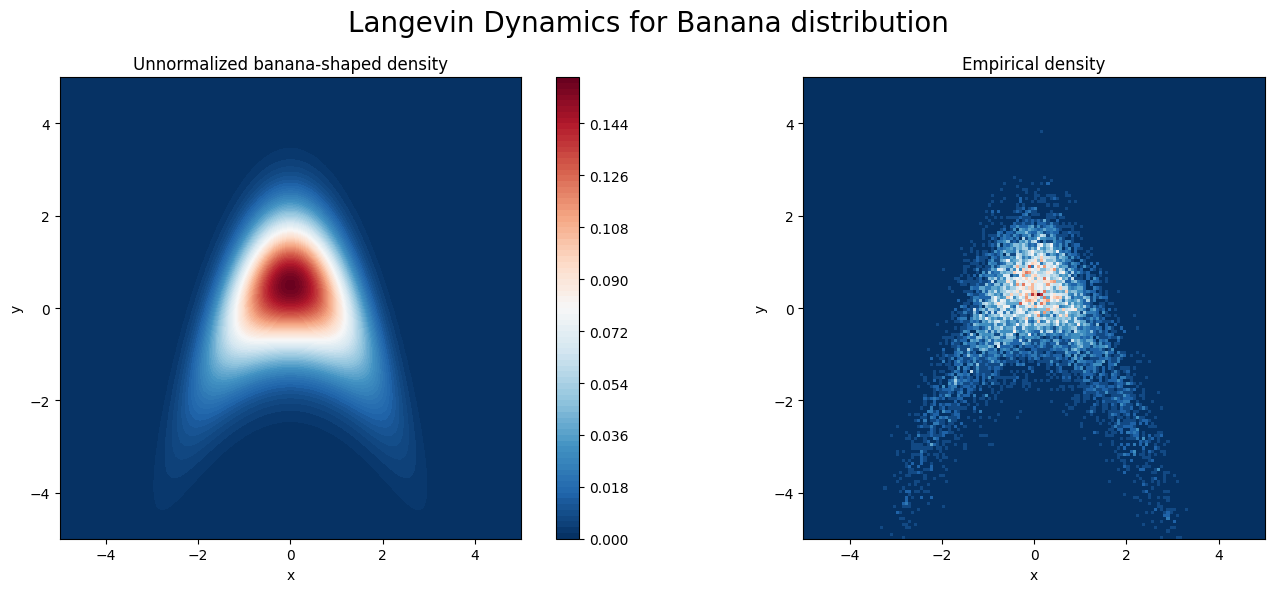

In [16]:
banana_samples = langevin.unnadjusted_langevin_sampling(scores.score_banana, step,
                                                    iterations, n_samples, mu_banana, sigma_banana)

dynamics_plot.langevin_sampling_banana(banana_samples, mu_banana, sigma_banana, b)

#### Distribution reconstruction with Metropolis-Hastings Adjusted Langevin

Acceptance rate:  0.59


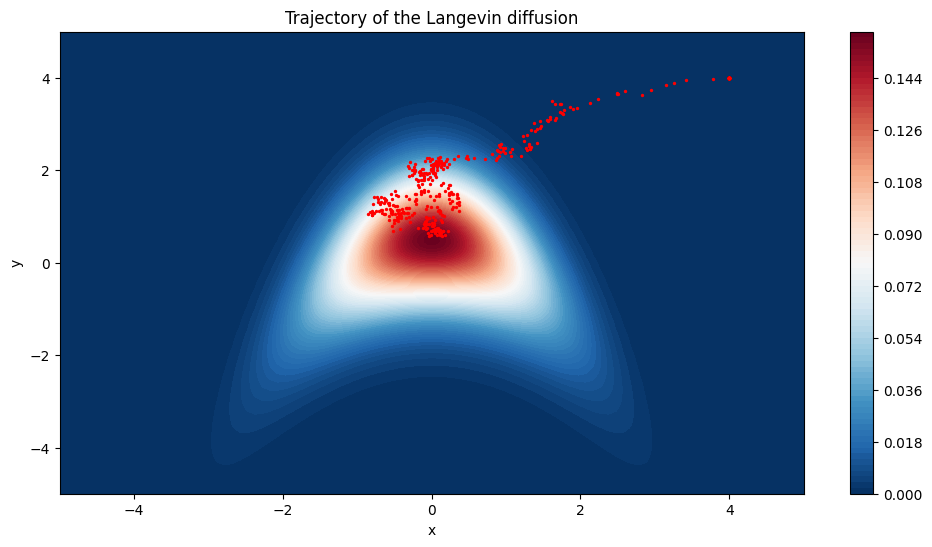

In [17]:
_, x_trajectory_mh_banana = langevin.mh_langevin_exact_scores(np.array([4,4]), scores.score_banana,
                                                                                0.005, iterations*2, mu_banana, sigma_banana)

dynamics_plot.langevin_trajectory_banana(x_trajectory_mh_banana, mu_banana, sigma_banana, b)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:54<00:00, 87.71it/s]


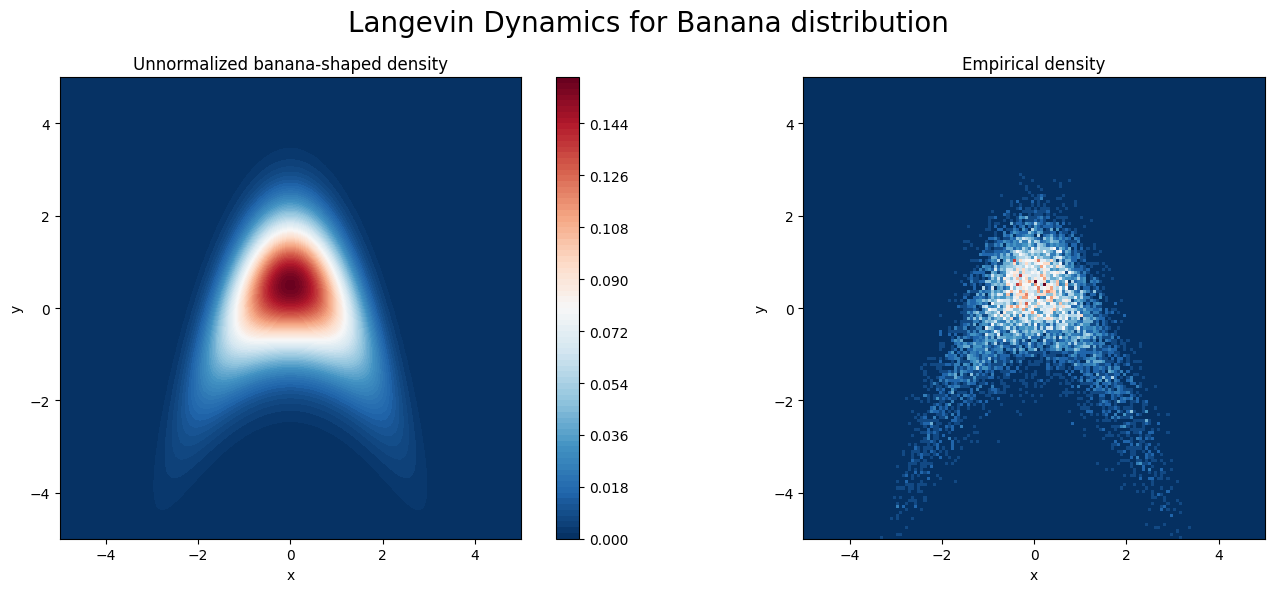

In [18]:
banana_samples_mh = langevin.mh_langevin_sampling(scores.score_banana, step,
                                                iterations, n_samples, mu_banana, sigma_banana)

dynamics_plot.langevin_sampling_banana(banana_samples_mh, mu_banana, sigma_banana, b)